In [1]:
#####################################################################
#####################################################################
# PERFORM A DIRECT SIMULATION WITH  DASSFLOW2D
# LAKE AT REST
#
# Introduction to basic commands of run and visualisation of results
#####################################################################
#####################################################################


#=======================================================#
# Source librairies
#=======================================================#

import dassflow2d as df2d
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#=======================================================#
# copy of case files
#=======================================================#

os.chdir('../../')
dassflow_dir = os.getcwd() # DassFlow directory (you can also impose your absolute path)

#dassflow_dir="/home/pagarambois/Documents/Distant/dassflow2d"
os.chdir(dassflow_dir)
print("DassFlow directory is: ", dassflow_dir)

# Define directory where case is run
# (its name 'bin_A' is imposed in  {dassflow_dir}/code/makefile.inc : CASEDIR='bin_A')
run_dir = f"{dassflow_dir}/code/bin_A/"

# Define directory containing case data
case_data_dir = f"{dassflow_dir}/cases/tuto_case/1_lake-at-rest/bin_A/"

# Clean run directory
os.system(f"rm -r {run_dir}*")

# Copy case data to runing directory
os.system(f"cp -r {case_data_dir}* {run_dir}") # Copy of case files from existing case to bin_A

# Move to code directory and clean bin directory
os.chdir( f"{dassflow_dir}/code/")
os.system("make cleanres cleanmin") # Clean forward run and minimization results

DassFlow directory is:  /home/pagarambois/Bureau/DISTANT/dassflow2d_doc/dassflow2d
make[1]: Entering directory '/home/pagarambois/Bureau/DISTANT/dassflow2d_doc/dassflow2d/code'
rm -rf ./bin_A/res/*
rm -rf ./bin_A/graph/*
rm -rf ./bin_A/min/*
make[1]: Leaving directory '/home/pagarambois/Bureau/DISTANT/dassflow2d_doc/dassflow2d/code'


0

In [2]:
#=======================================================#
# Initialisation
#=======================================================#

# input file reading (simulation settings)
df2d.wrapping.read_input(f"{run_dir}/input.txt")

# Creation of dassflowmodel object using case data:
df2d.wrapping.m_mpi.init_mpi() #set the number of processes to 1
my_model = df2d.dassflowmodel(bin_dir =  run_dir, hdf5_path = f"{dassflow_dir}/code/bin_A/res/simu.hdf5" , run_type = "direct", clean = True, custom_config = None)

my_model.config.get()

# Initializion of the Fortran kernel (dassflow Python library is obtained by wrapping Fortran source code)
#initialise all fortran kernel values and source them into dassflowmodel object

my_model.init_all()

my_model.kernel.dof0.h[:] = 1
my_model.kernel.dof.h[:] = 1

clean= True

*  Mesh Loading                                                                *
 OUT calc_cells_connectivity
*  Mesh Loading is OK                                                          *

********************************************************************************
 range     =             307
 precision =              15
 zerom     =   1.0730891E-16
 pinfm     =   9.4967820E+15
 minfm     =  -9.4967820E+15
 hugem     =   1.7976931+308
 tinym     =   2.2250739-308
********************************************************************************


In [3]:
#=======================================================#
# Run Fortran kernel and save results
#=======================================================#

my_model.run()
my_model.save_all()

dassflow2d.wrapping.call_model.run(self = self.kernel, arg = self.run_type)

*  Running Shallow-Water Model in direct mode                                  *


*  Writing Result File                                                         *
nt =        0 t =  0.00000E+00 /  3.60000E+04 (   0.0 % ) , dt =  1.000000E+00
nt =      263 t =  3.60209E+02 /  3.60000E+04 (   1.0 % ) , dt =  1.405832E+00
nt =      519 t =  7.21378E+02 /  3.60000E+04 (   2.0 % ) , dt =  1.413758E+00
nt =      773 t =  1.08063E+03 /  3.60000E+04 (   3.0 % ) , dt =  1.414992E+00
nt =     1027 t =  1.44008E+03 /  3.60000E+04 (   4.0 % ) , dt =  1.415243E+00
nt =     1282 t =  1.80097E+03 /  3.60000E+04 (   5.0 % ) , dt =  1.415294E+00
nt =     1536 t =  2.16046E+03 /  3.60000E+04 (   6.0 % ) , dt =  1.415334E+00
nt =     1791 t =  2.52138E+03 /  3.60000E+04 (   7.0 % ) , dt =  1.415362E+00
nt =     2045 t =  2.88088E+03 /  3.60000E+04 (   8.0 % ) , dt =  1.415375E+00
nt =     2299 t =  3.24039E+03 /  3.60000E+04 

(   9.0 % ) , dt =  1.415381E+00
nt =     2554 t =  3.60131E+03 /  3.60000E+04 (  10.0 % ) , dt =  1.415384E+00
*  Writing Result File                                                         *
nt =     2554 t =  3.60131E+03 /  3.60000E+04 (  10.0 % ) , dt =  1.415384E+00
nt =     2808 t =  3.96082E+03 /  3.60000E+04 (  11.0 % ) , dt =  1.415385E+00
nt =     3062 t =  4.32033E+03 /  3.60000E+04 (  12.0 % ) , dt =  1.415386E+00
nt =     3317 t =  4.68125E+03 /  3.60000E+04 (  13.0 % ) , dt =  1.415386E+00
nt =     3571 t =  5.04076E+03 /  3.60000E+04 (  14.0 % ) , dt =  1.415386E+00
nt =     3825 t =  5.40027E+03 /  3.60000E+04 (  15.0 % ) , dt =  1.415386E+00
nt =     4080 t =  5.76119E+03 /  3.60000E+04 (  16.0 % ) , dt =  1.415386E+00
nt =     4334 t =  6.12070E+03 /  3.60000E+04 (  17.0 % ) , dt =  1.415386E+00
nt =     4588 t =  6.48021E+03 /  3.60000E+04 (  18.0 % ) , dt =  1.415386E+00
nt =     4843 t =  6.84113E+03 /  3.60000E+04 (  19.0 % ) , dt =  1.415386E+00
nt =     5097 t =

In [4]:
#=======================================================#
# Vizualize parameters and results
#=======================================================#

In [5]:
# Plot of the 2D bathymetry (input parameter of the 2D shallow water model) with package plot function

#plotter = my_model.plot_var(my_model.meshing.mesh_pyvista,
#                                             what = "bathy",
#                                             title_plot = "Bathymetry elevation")# for a local run remove notebook option or set notebook=False

#plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


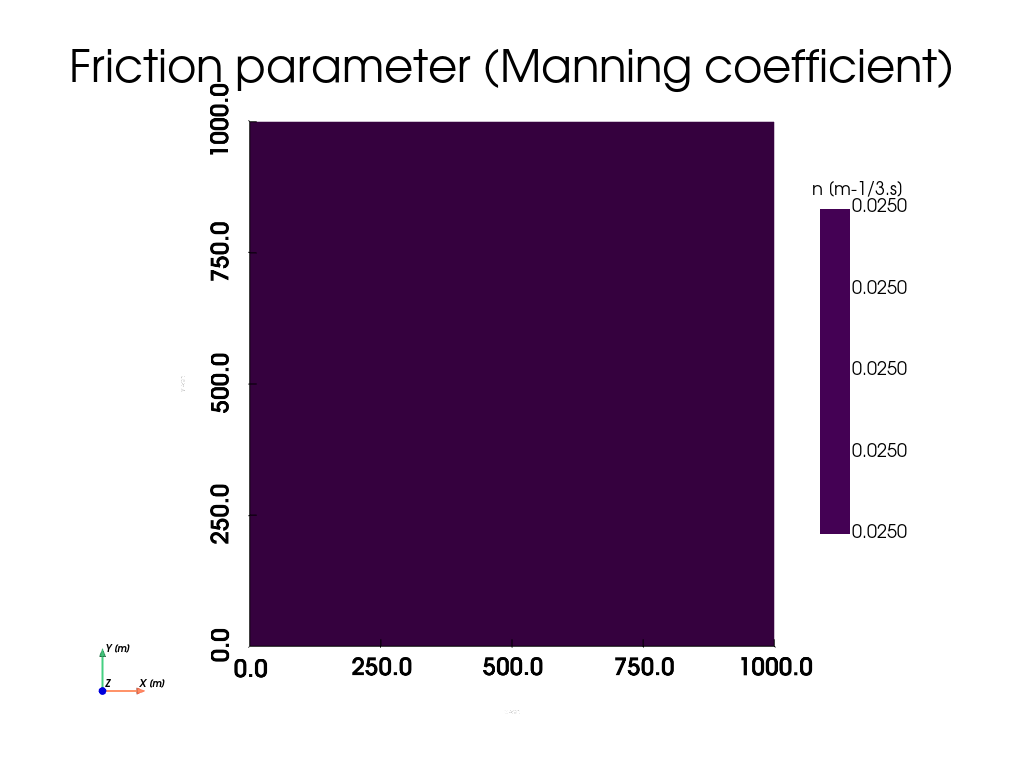

In [6]:
# Plot the friction parameter field
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "manning_alpha",
                                             title_scale_bar ="n [m-1/3.s] ",
                                             title_plot = "Friction parameter (Manning coefficient)",
                                             notebook = True )# for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


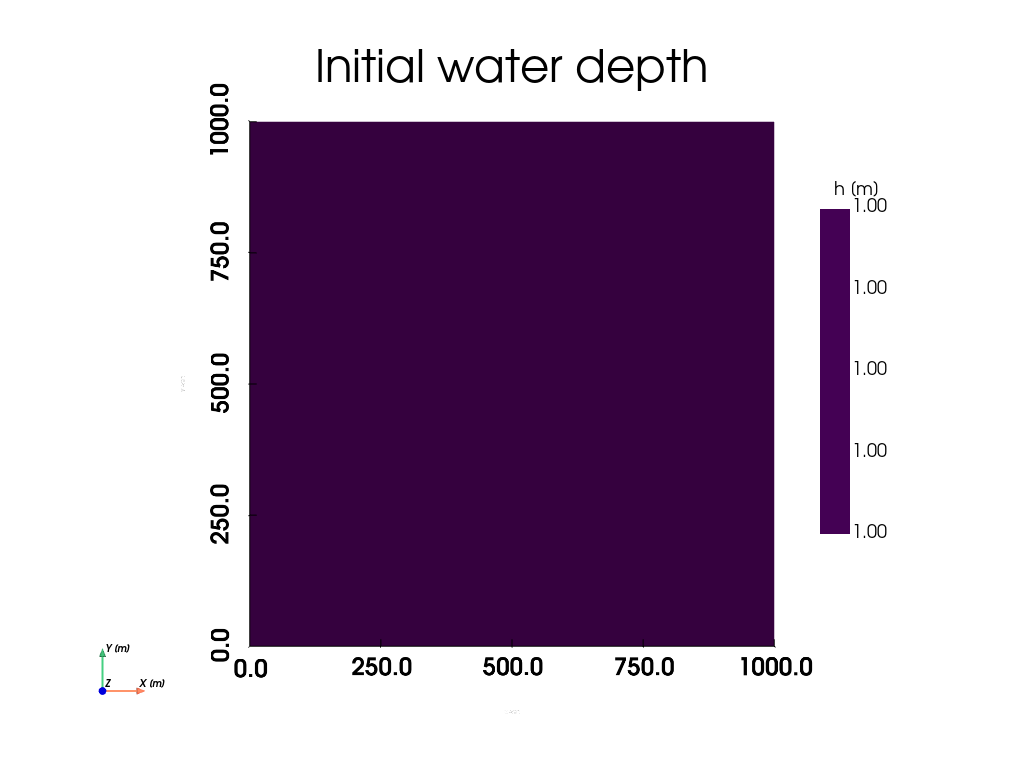

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


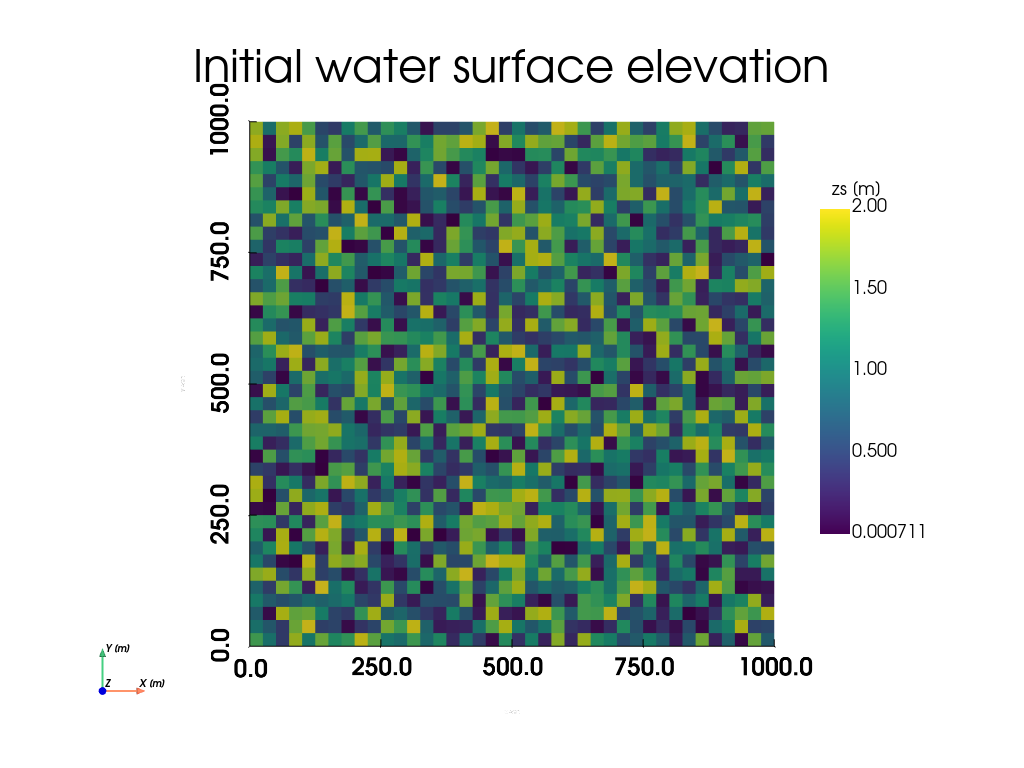

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


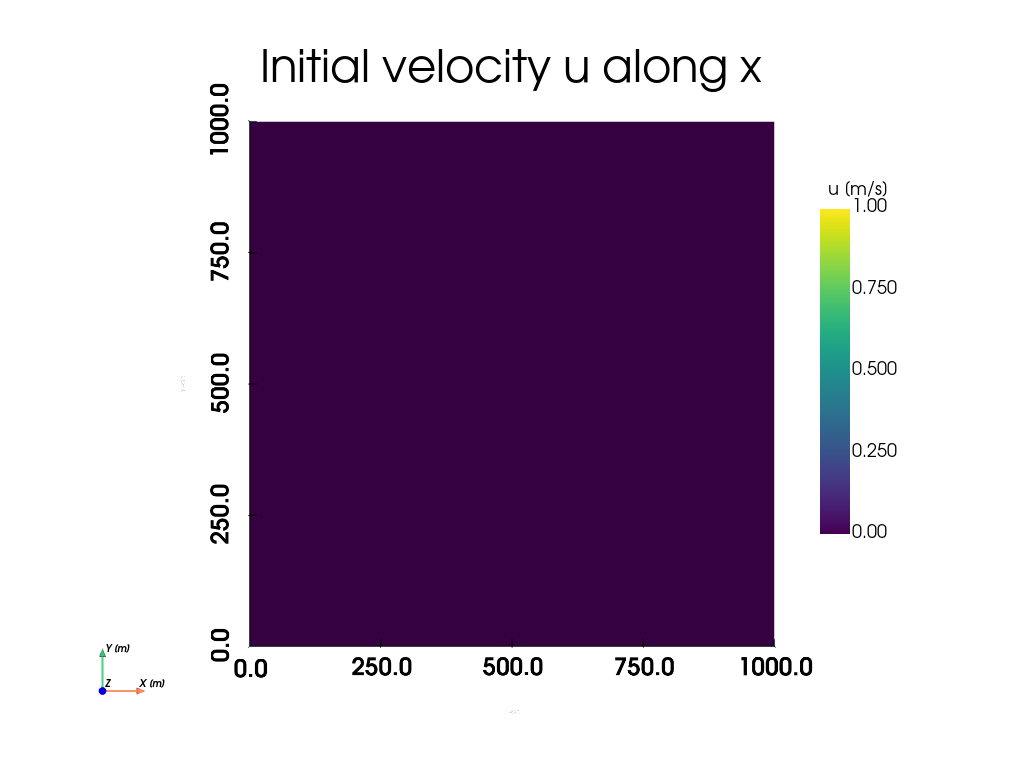

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


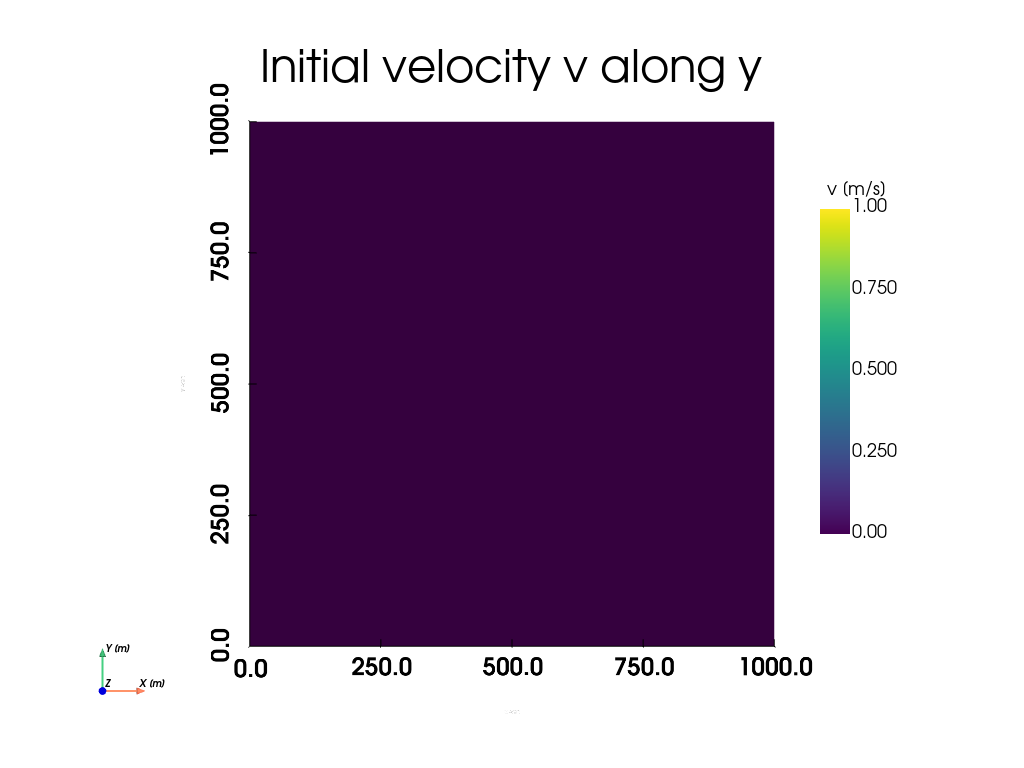

In [7]:
# Plot intial flow conditions

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "h",
                                             when = 0,
                                             title_scale_bar ="h [m] ",
                                             title_plot = "Initial water depth",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "zs",
                                             when = 0,
                                             title_scale_bar ="zs [m] ",
                                             title_plot = "Initial water surface elevation",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "u",
                                             when = 0,
                                             title_scale_bar ="u [m/s] ",
                                             title_plot = "Initial velocity u along x",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed


plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "v",
                                             when = 0,
                                             title_scale_bar ="v [m/s] ",
                                             title_plot = "Initial velocity v along y",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


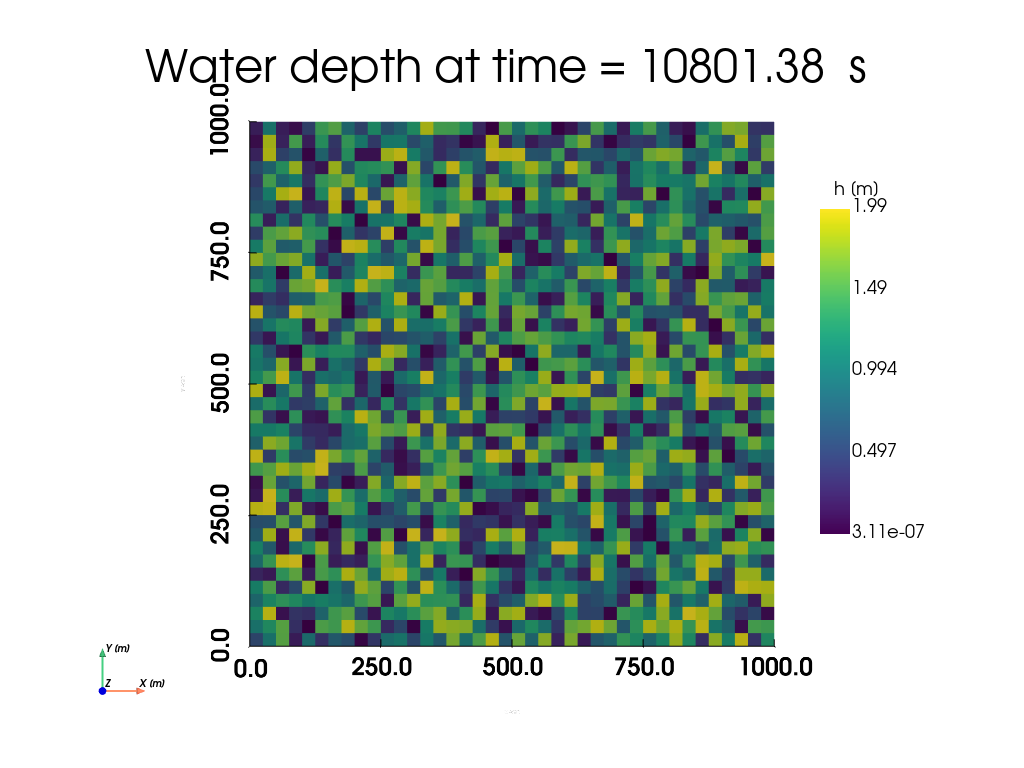

[    0.     3601.311  7200.637 10801.38  14400.71  18000.03  21600.77
 25200.1   28800.84  32400.17  36000.   ]
previous plot for t =  10801.38


In [8]:
# Plot flow depth at a given time
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "h",
                                             when = 3,
                                             title_scale_bar ="h [m] ",
                                             title_plot = f"Water depth at time = {my_model.outputs.result.all_time[3]}  s ",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

# Simulation time steps at which variables have been written
print(my_model.outputs.result.all_time)

print("previous plot for t = ", my_model.outputs.result.all_time[3])

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


shape of velocity array is :  (1600, 11)
Maximum velocity magnitude at ecah time step is :  [0.00000000e+00 3.94337948e-03 5.01612814e-04 6.62154500e-05
 8.79081429e-06 1.16776697e-06 1.54975391e-07 2.05580807e-08
 2.70801607e-09 3.45204829e-10 8.70955869e-11]


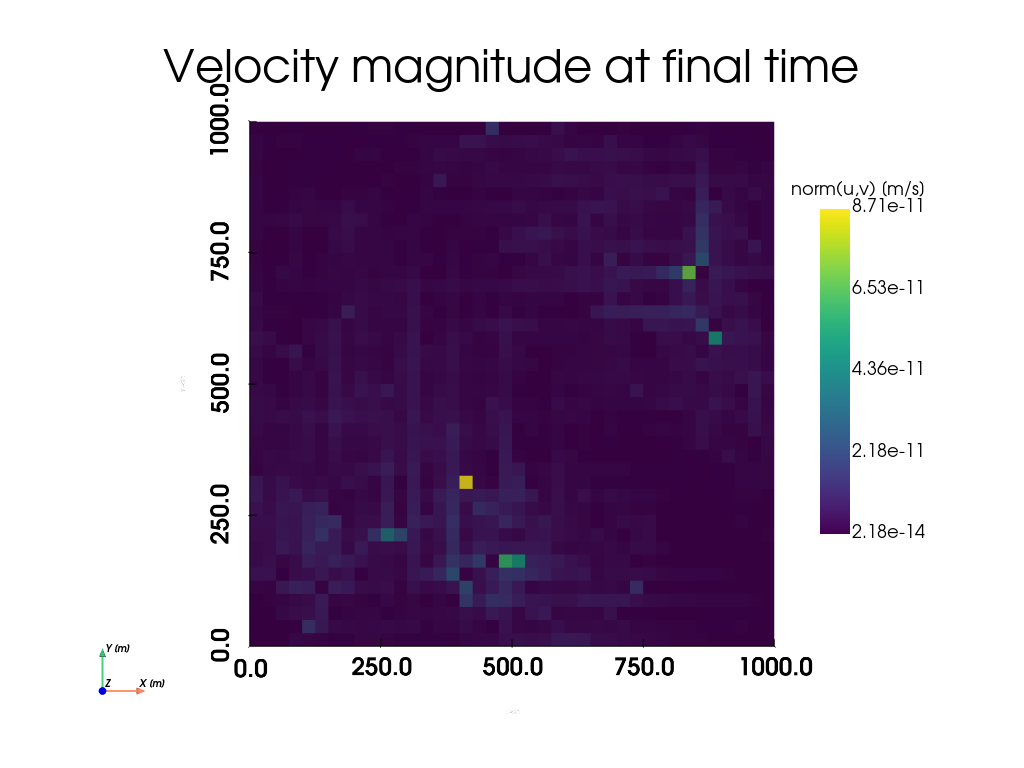

/home/pagarambois/.local/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:33: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


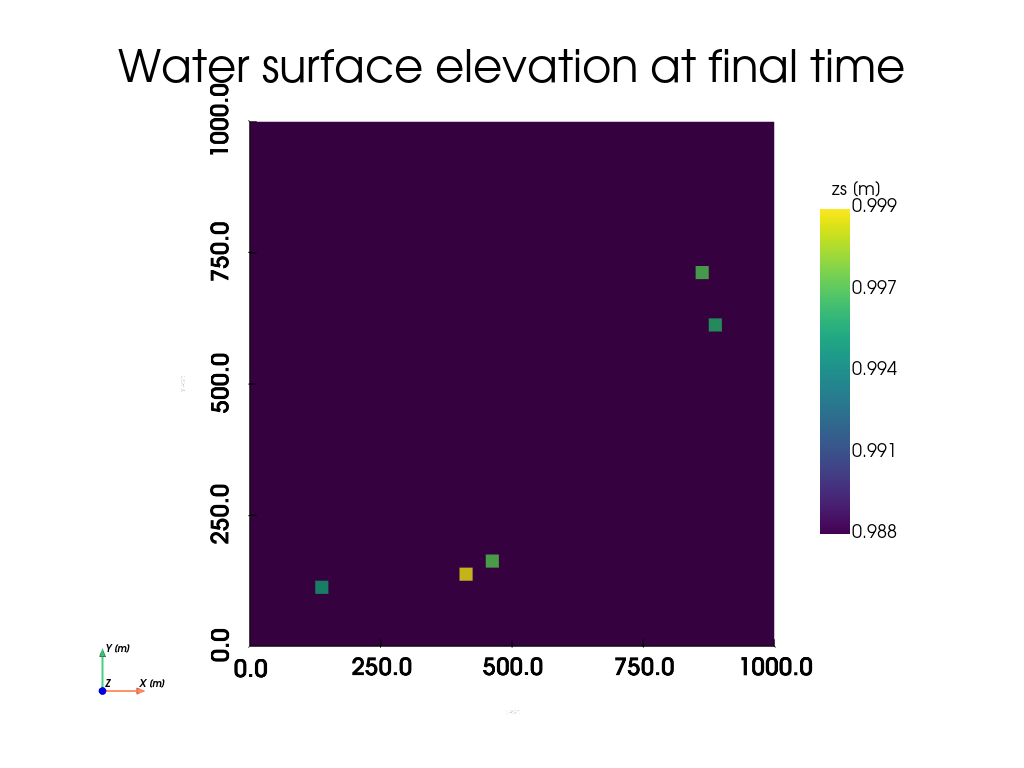

In [9]:
# Compute velocity magnitude

u = my_model.outputs.result.u
v = my_model.outputs.result.v
norm_vel = np.sqrt(u**2+v**2)

# Print the shape of the output velocity fields
print("shape of velocity array is : ", np.shape(norm_vel))
print("Maximum velocity magnitude at ecah time step is : ", np.amax(norm_vel,axis=0))


# Plot velocity magnitude at final time step
plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             my_scalar = norm_vel[:,-1],
                                             title_scale_bar ="norm(u,v) [m/s] ",
                                             title_plot = f"Velocity magnitude at final time",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

# Plot water surface elevation at final time step

plotter = my_model.outputs.result.plot_field(my_mesh = my_model.meshing.mesh_pyvista,
                                             what = "zs",
                                             when = -1,
                                             title_scale_bar ="zs [m] ",
                                             title_plot = f"Water surface elevation at final time",
                                             notebook=True) # for a local run remove notebook option or set notebook=False

plotter.show(jupyter_backend='trame') # remove jupyter_backend if needed

In [10]:
print(my_model.config)

print("The numerical scheme that has been used to solve the 2D shallow water equations is:")
print("Temporal scheme is: ", my_model.config["temp_scheme"])
print("Spatial scheme is: ", my_model.config["spatial_scheme"])

{'mesh_name': 'automaticaly_generated_mesh.txt', 'ts': 36000.0, 'dta': 0, 'dtw': 3600.0, 'dtp': 60.0, 'dt': 1.0, 'temp_scheme': 'euler', 'spatial_scheme': 'first_b1', 'adapt_dt': 1, 'cfl': 0.5, 'feedback_inflow': 1, 'coef_feedback': 0.1, 'heps': 0, 'friction': 1, 'g': 9.81, 'w_tecplot': 0, 'w_vtk': 0, 'w_gnuplot': 1, 'w_obs': 0, 'use_obs': 0, 'max_nt_for_adjoint': 2500, 'c_manning': 0, 'c_manning_beta': 0, 'c_bathy': 0, 'c_hydrograph': 0, 'c_ratcurve': 0, 'c_rain': 0, 'c_ic': 0, 'restart_min': 0, 'eps_min': 0}
The numerical scheme that has been used to solve the 2D shallow water equations is:
Temporal scheme is:  euler
Spatial scheme is:  first_b1


In [11]:
#clean model
df2d.wrapping.call_model.clean_model(my_model.kernel)